In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("F:\SACHIN\Study\Projects\ML_Data\linear-regression\\train.csv")
test = pd.read_csv("F:\SACHIN\Study\Projects\ML_Data\linear-regression\\test.csv")

In [3]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
train.dropna(inplace=True)
print(train.isnull().any())
print(train.shape[0])
train.describe()

x    False
y    False
dtype: bool
699


,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


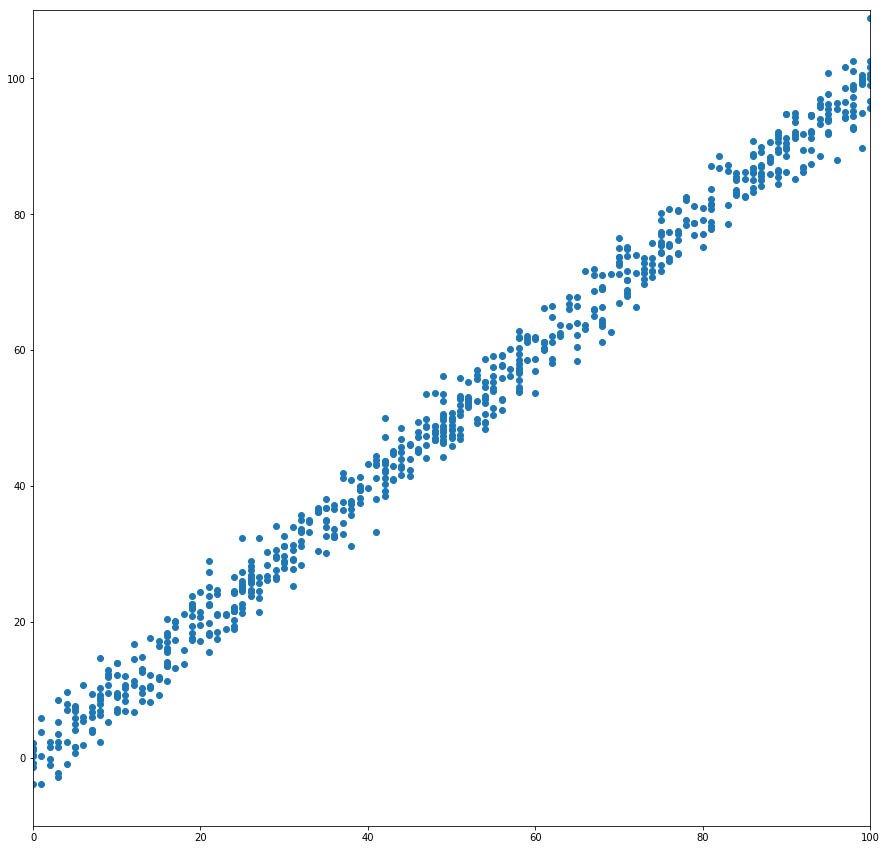

In [6]:
plt.figure(figsize=(15,15))
plt.axis([0, 100, -10, 110])
plt.scatter(train['x'], train['y'])
plt.show()

In [7]:
def hypothesis(theta, x):
    return theta[0] + theta[1] * x

In [8]:
def gradient_descent(theta, X, Y):
    theta_0 = 0
    theta_1 = 0
    alpha = 0.0001
    i = 0
    for x in X:
        theta_0 += hypothesis(theta, x) - Y.values[i]
        theta_1 += (hypothesis(theta, x) - Y.values[i])*x
        i += 1
        
    return [theta[0] - alpha*(theta_0 / len(X)), 
            theta[1] - alpha*(theta_1 / len(X))]

In [9]:
def cost_function(theta, X, Y):
    total = 0
    i = 0
    for x in X:
        total += (hypothesis(theta, x) - Y.values[i])**2
        i+=1
    return total / (2 * len(X))

In [10]:
theta = [0, 0]
X = train['x']
Y = train['y']

In [11]:
errors = []
for i in range(50):
    errors.append(cost_function(theta, X, Y))
    theta = gradient_descent(theta, X, Y)
print("theta: ", theta)

theta:  [0.014811035918317205, 0.99882745996520972]


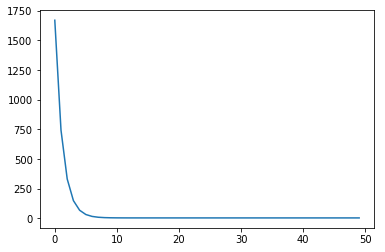

3.9357449136


In [12]:
x_axis = [x for x in range(50)]
plt.plot(x_axis, errors)
plt.show()
print(min(errors))

-3.83998112
108.8716183
-3.82066755249
108.758773005


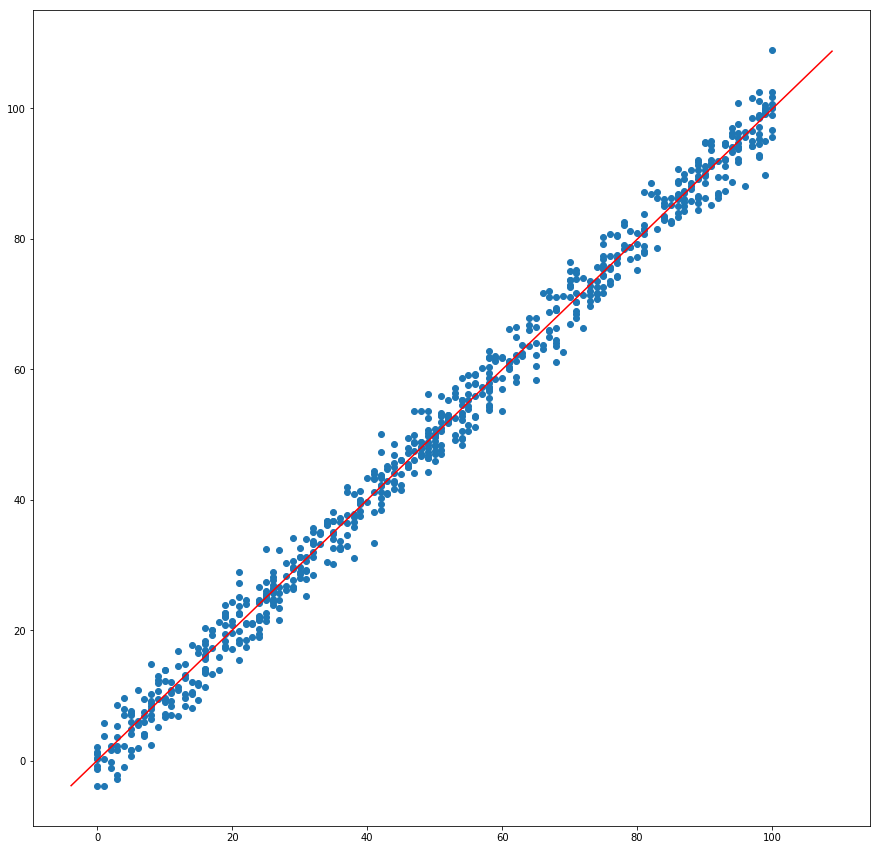

In [28]:
x1 = min(train['y'])
print(x1)
x2 = max(train['y'])
print(x2)

y1 = hypothesis(theta, x1)
print(y1)
y2 = hypothesis(theta, x2)
print(y2)

plt.figure(figsize = (15,15))
plt.plot([x1,x2], [y1,y2], color = 'red')
plt.scatter(train['x'] , train['y'])
plt.show()

In [30]:
X_test = test['x']
Y_test = test['y']
cost_function(theta, X_test, Y_test)

4.7285966253122931